In [2]:
import healpy as h
import sys  ; sys.path.append("../../codes/")
from modules_v2 import euler as euler
from modules_v2 import rs_rad_ker as rk
from scipy.interpolate import interp1d

%pylab notebook

figpath="../../figures/kernel_telescoping/"
!mkdir $figpath

Populating the interactive namespace from numpy and matplotlib


# Evaluating the radial kernels.

In [14]:
sampling=8000 ; lmaxh=1024 ; lmaxl=64

theta,pl2=rk.get_plm0(lmaxh,sampling,theta_max=180.*pi/180.)

rad_kerh=rk.calc_qu2eb_rad_ker(lmaxh,theta,pl2)
rad_ker_ih,rad_ker_dh=rk.calc_qu2queb_rad_ker(lmaxh,theta,pl2)

rad_kerl=rk.calc_qu2eb_rad_ker(lmaxl,theta,pl2)
rad_ker_il,rad_ker_dl=rk.calc_qu2queb_rad_ker(lmaxl,theta,pl2)

# Telescoping behaviour of ${}_{\mathcal{M}}f$

<IPython.core.display.Javascript object>


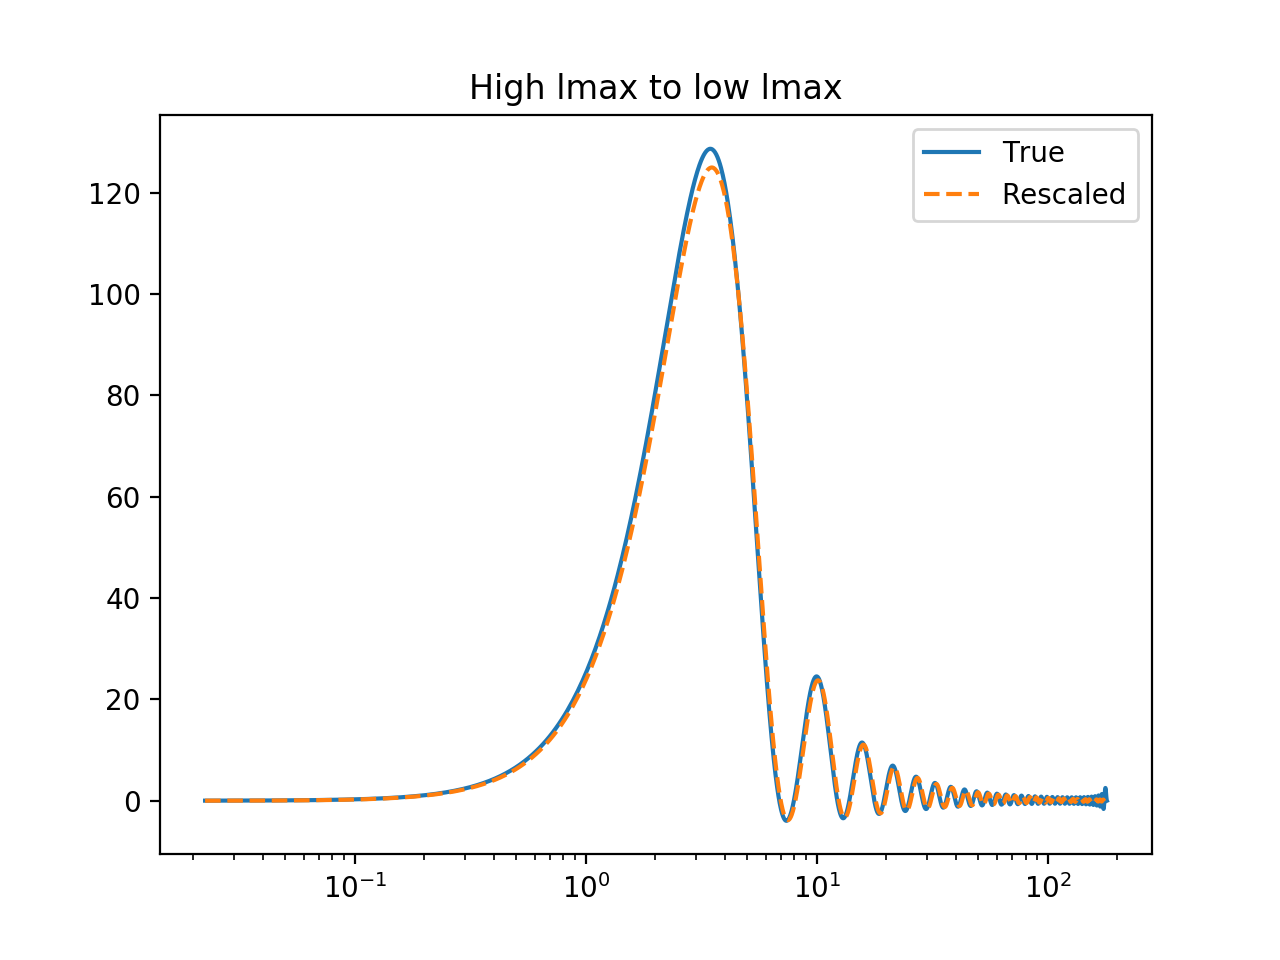

<IPython.core.display.Javascript object>


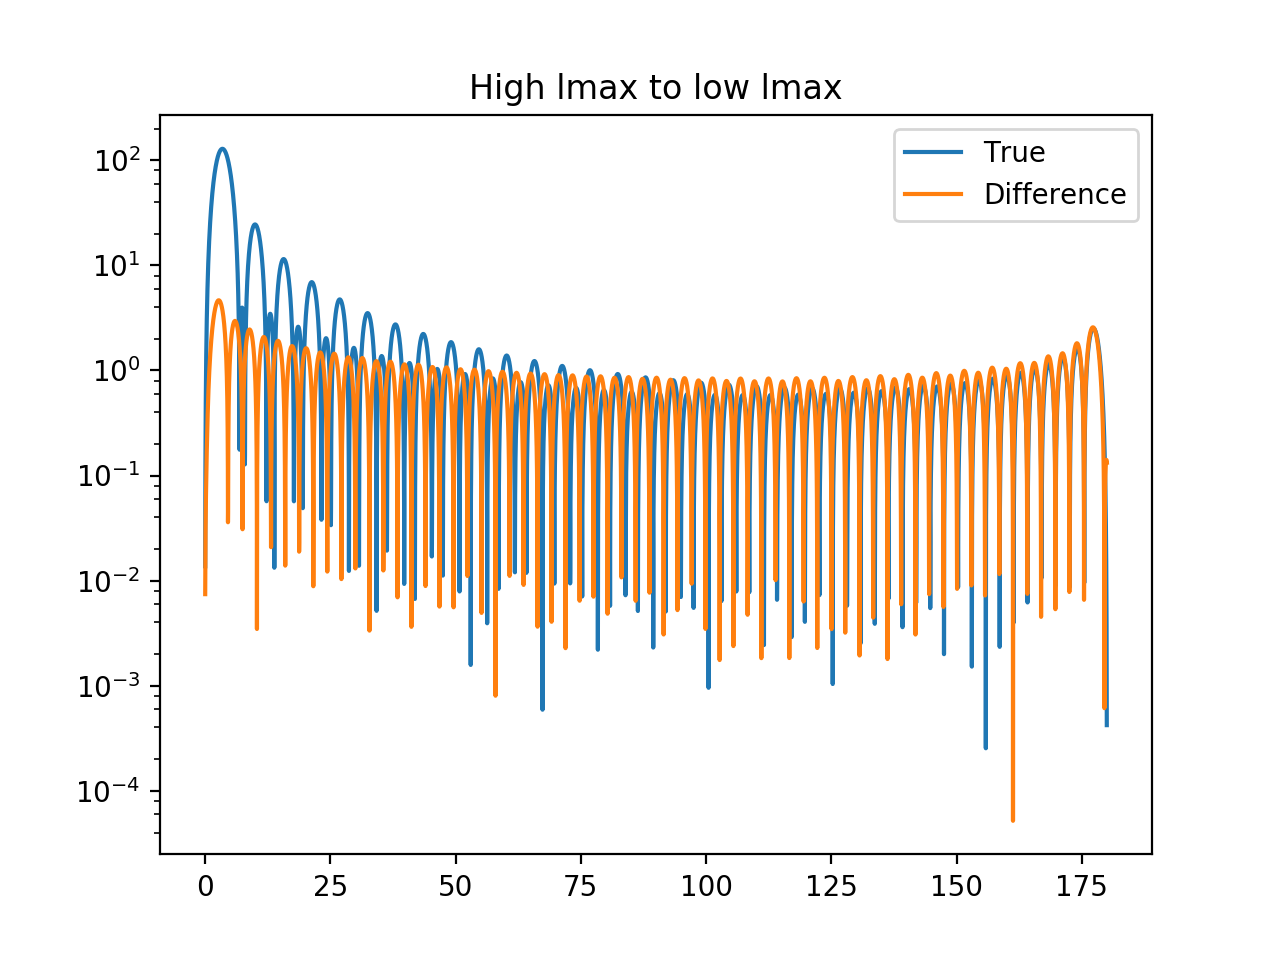

<IPython.core.display.Javascript object>


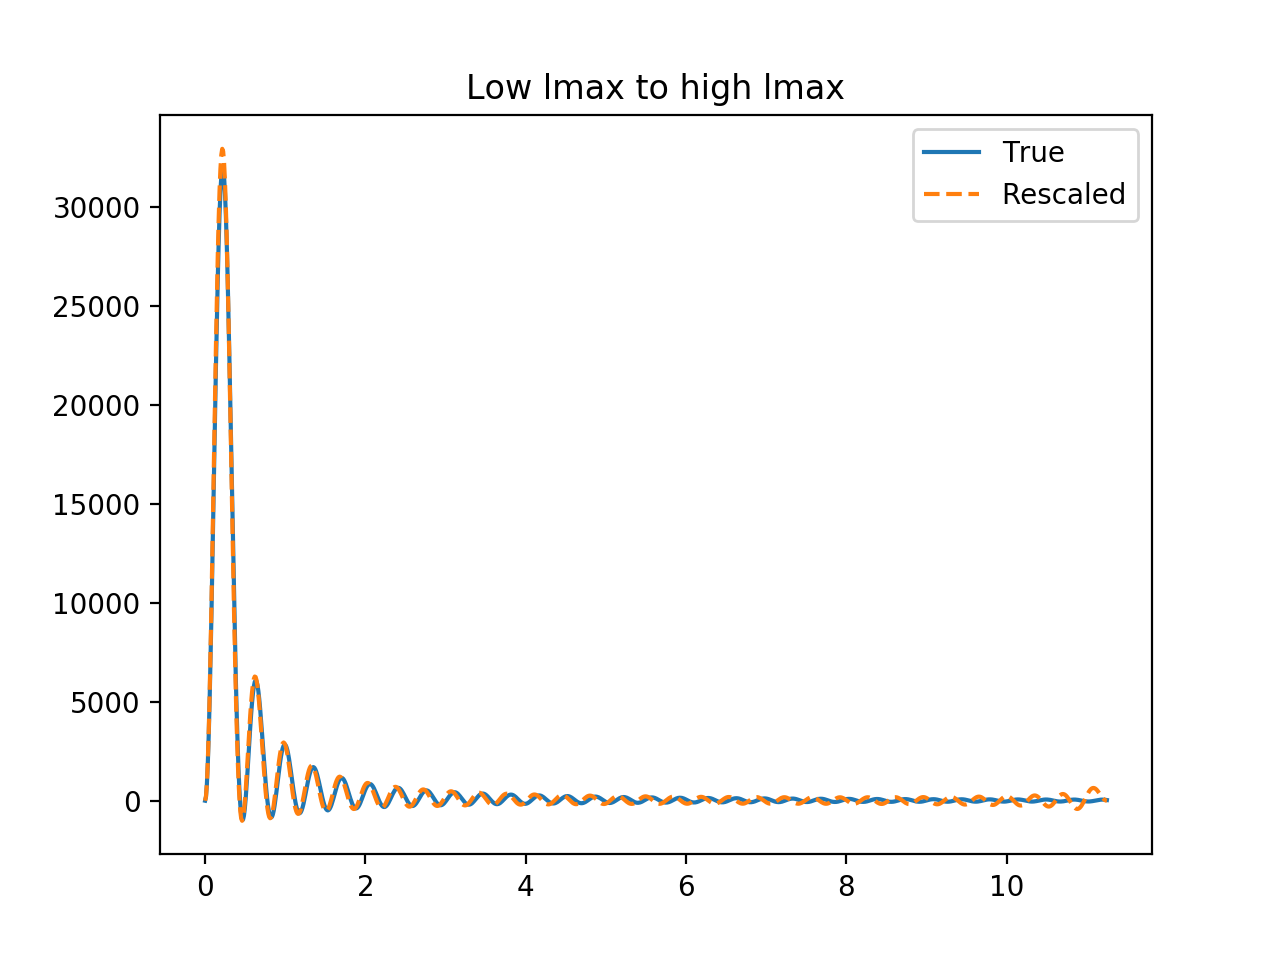

<IPython.core.display.Javascript object>


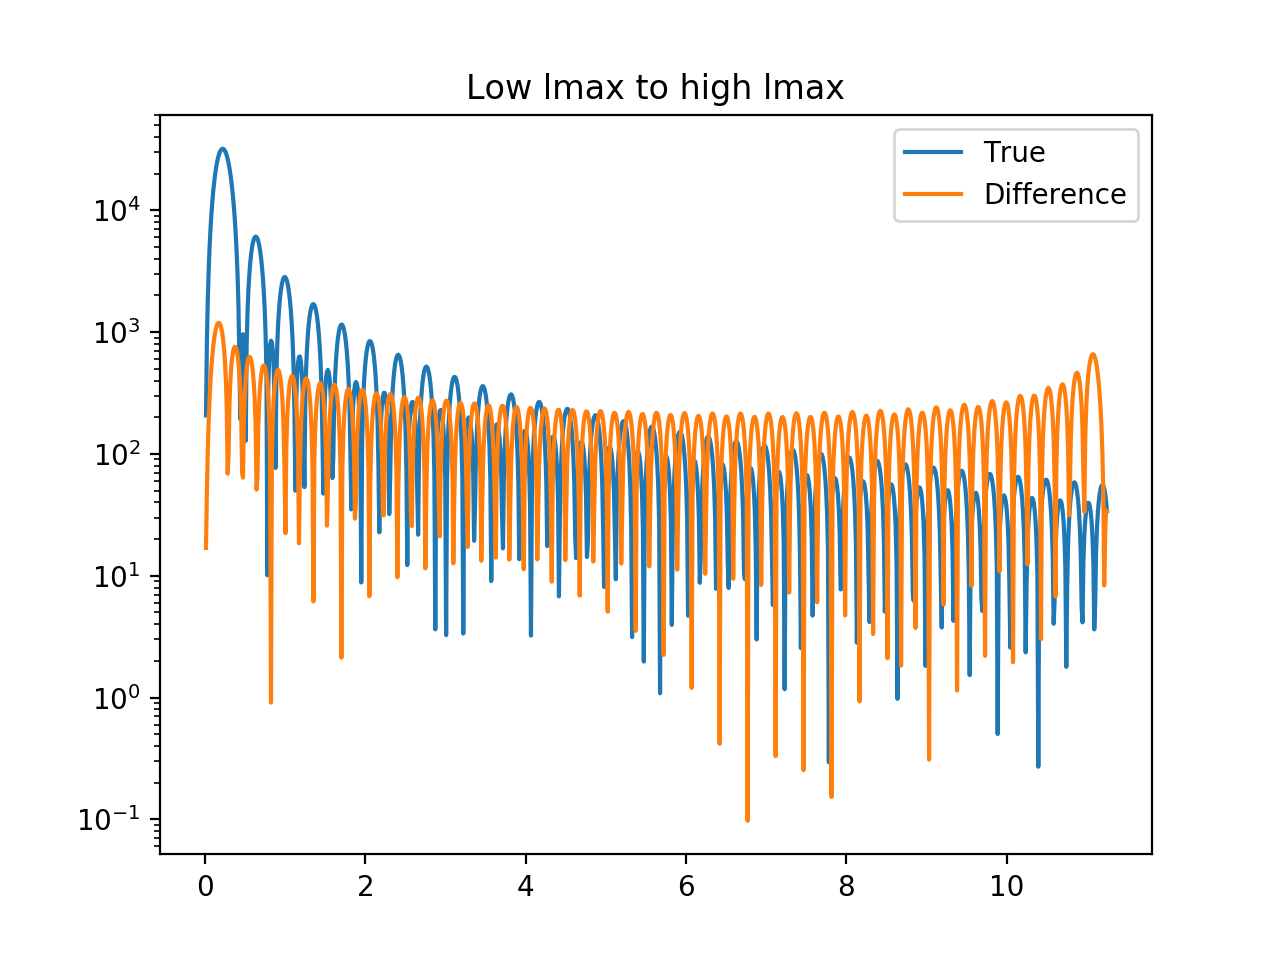

[]

In [22]:
fn_l=interp1d(theta,rad_kerl,bounds_error=False,fill_value=0,kind="cubic")
fn_h=interp1d(theta,rad_kerh,bounds_error=False,fill_value=0,kind="cubic")

figure()
title("High lmax to low lmax")
plot(theta*180./pi,fn_l(theta),label="True")
plot(theta*180./pi,fn_h(theta*lmaxl/lmaxh)*(lmaxl*1./lmaxh)**2.,"--",label="Rescaled")
legend(loc=0)
semilogx()

figure()
title("High lmax to low lmax")
plot(theta*180./pi,abs(fn_l(theta)),label="True")
plot(theta*180./pi,abs(fn_l(theta) - fn_h(theta*lmaxl/lmaxh)*(lmaxl*1./lmaxh)**2.),label="Difference")
semilogy()
legend(loc=0)
#ylim(-1,1)

thetap=linspace(0,pi*lmaxl/lmaxh,1000)
figure()
title("Low lmax to high lmax")
plot(thetap*180./pi,fn_h(thetap),label="True")
plot(thetap*180./pi,fn_l(thetap*lmaxh/lmaxl)*(lmaxh*1./lmaxl)**2.,"--",label="Rescaled")
legend(loc=0)

figure()
title("Low lmax to high lmax")
plot(thetap*180./pi,abs(fn_h(thetap)),label="True")
plot(thetap*180./pi,abs(fn_h(thetap) - fn_l(thetap*lmaxh/lmaxl)*(lmaxh*1./lmaxl)**2.),label="Difference")
legend(loc=0)
semilogy()

# Telescoping behaviour of ${}_{\mathcal{I}}f$

In [ ]:
fn_l=interp1d(theta,rad_ker_il)
fn_h=interp1d(theta,rad_ker_ih)

figure()
plot(theta*180./pi,fn_l(theta),label="True")
plot(theta*180./pi,fn_h(theta*lmaxl/lmaxh)*(lmaxl*1./lmaxh)**2.,"--",label="Rescaled")
legend(loc=0)

figure()
plot(theta*180./pi,abs(fn_l(theta) - fn_h(theta*lmaxl/lmaxh)*(lmaxl*1./lmaxh)**2.))
semilogy()
#ylim(-1,1)

# Telescoping behaviour of ${}_{\mathcal{D}}f$

In [ ]:
fn_l=interp1d(theta,rad_ker_dl)
fn_h=interp1d(theta,rad_ker_dh)

figure()
plot(theta*180./pi,fn_l(theta),label="True")
plot(theta*180./pi,fn_h(theta*lmaxl/lmaxh)*(lmaxl*1./lmaxh)**2.,"--",label="Rescaled")
legend(loc=0)

figure()
plot(theta*180./pi,(fn_l(theta) - fn_h(theta*lmaxl/lmaxh)*(lmaxl*1./lmaxh)**2.))
#ylim(-1,1)